In [ ]:
import random


class Paciente:
    def __init__(self, tiempo_llegada):
        self.tiempo_llegada = tiempo_llegada
        self.tiempo_servicio = random.expovariate(1/720)  # Tiempo de servicio exponencial

class Evento:
    LLEGADA = 0
    INICIO_SERVICIO = 1
    FIN_SERVICIO = 2

class SimuladorClinica:
    def __init__(self, tasa_llegada, capacidad_asientos, prob_paciente_de_pie):
        self.tiempo_actual = 0
        self.tasa_llegada = tasa_llegada
        self.capacidad_asientos = capacidad_asientos
        self.prob_paciente_de_pie = prob_paciente_de_pie
        self.pacientes_en_espera = []
        self.paciente_actual = None
        self.eventos = []

    def llegada_paciente(self):
        nuevo_paciente = Paciente(self.tiempo_actual)
        print(f"Tiempo {self.tiempo_actual}: Llega paciente")
        if len(self.pacientes_en_espera) < self.capacidad_asientos:
            self.pacientes_en_espera.append(nuevo_paciente)
            print("Paciente encuentra asiento")
            if self.paciente_actual is None:
                self.programar_inicio_servicio()
        else:
            if random.random() > self.prob_paciente_de_pie:
                self.pacientes_en_espera.append(nuevo_paciente)
                print("Cliente debe esperar de pie")



        self.programar_llegada()

    def inicio_servicio(self):
        self.paciente_actual = self.pacientes_en_espera.pop(0)
        print(f"Tiempo {self.tiempo_actual}: Inicia servicio a paciente")
        self.programar_fin_servicio()

    def fin_servicio(self):
        self.paciente_actual = None
        print(f"Tiempo {self.tiempo_actual}: Finaliza servicio a paciente")
        if self.pacientes_en_espera:
            self.paciente_actual = self.pacientes_en_espera.pop(0)
            self.programar_fin_servicio()

    def programar_llegada(self):
        tiempo_llegada = self.tiempo_actual + random.expovariate(self.tasa_llegada)
        self.eventos.append((tiempo_llegada, Evento.LLEGADA))

    def programar_inicio_servicio(self):
        self.eventos.append((self.tiempo_actual, Evento.INICIO_SERVICIO))

    def programar_fin_servicio(self):
        tiempo_fin_servicio = self.tiempo_actual + self.paciente_actual.tiempo_servicio
        self.eventos.append((tiempo_fin_servicio, Evento.FIN_SERVICIO))

    def simular(self, tiempo_simulacion):
        self.programar_llegada()
        while self.tiempo_actual < tiempo_simulacion:
            self.eventos.sort(key=lambda x: x[0])
            tiempo_evento, tipo_evento = self.eventos.pop(0)
            self.tiempo_actual = tiempo_evento

            if tipo_evento == Evento.LLEGADA:
                self.llegada_paciente()
            elif tipo_evento == Evento.INICIO_SERVICIO:
                self.inicio_servicio()
            elif tipo_evento == Evento.FIN_SERVICIO:
                self.fin_servicio()

        return len(self.pacientes_en_espera)

# Función para encontrar la capacidad de sillas necesaria para que la probabilidad de que un cliente quede de pie sea del 10%
def encontrar_capacidad_sillas(prob_paciente_de_pie):
    capacidad_asientos = 2
    while True:
        simulador = SimuladorClinica(4/3600, capacidad_asientos, prob_paciente_de_pie)
        pacientes_restantes = simulador.simular(00)  # Simular una hora
        if pacientes_restantes == 0:
            return capacidad_asientos
        capacidad_asientos += 1

# Simulación
simulador = SimuladorClinica(4/3600, encontrar_capacidad_sillas(0.10), 0.10)
simulador.simular(900)  # Simular una hora


Tiempo 142.78789149966383: Llega paciente
Paciente encuentra asiento
Tiempo 142.78789149966383: Inicia servicio a paciente
Tiempo 343.18850262586346: Finaliza servicio a paciente
Tiempo 1021.8125014707653: Llega paciente
Paciente encuentra asiento


1

In [ ]:
import random

class Paciente:
    def __init__(self, tiempo_llegada):
        self.tiempo_llegada = tiempo_llegada
        self.tiempo_servicio = random.expovariate(1/720)  # Tiempo de servicio exponencial

class Evento:
    LLEGADA = 0
    INICIO_SERVICIO = 1
    FIN_SERVICIO = 2

class SimuladorClinica:
    def __init__(self):
        self.tiempo_actual = 0
        self.tasa_llegada = None
        self.capacidad_asientos = None
        self.pacientes_con_silla = []
        self.pacientes_de_pie = []
        self.paciente_actual = None
        self.eventos = []

    def configurar_simulacion(self, tasa_llegada, capacidad_asientos):
        self.tasa_llegada = tasa_llegada
        self.capacidad_asientos = capacidad_asientos


    def llegada_paciente(self):
        nuevo_paciente = Paciente(self.tiempo_actual)
        print(f"Tiempo {self.tiempo_actual}: Llega paciente")
        if len(self.pacientes_con_silla) < self.capacidad_asientos:
            self.pacientes_con_silla.append(nuevo_paciente)
            print(f"Tiempo {self.tiempo_actual}: Cantidad actual de pacientes en los asientos: {len(self.pacientes_con_silla)}")
            if self.paciente_actual is None:
                self.programar_inicio_servicio()
        else:
            self.pacientes_de_pie.append(nuevo_paciente)
            print("Cliente debe esperar de pie")

        self.programar_llegada()

    def inicio_servicio(self):
      if self.pacientes_con_silla:
          paciente_saliente = self.pacientes_con_silla.pop(0)
          print(f"Tiempo {self.tiempo_actual}: Paciente deja el asiento, pacientes en los asientos: {len(self.pacientes_con_silla)} ")
          self.paciente_actual = paciente_saliente
          print(f"Tiempo {self.tiempo_actual}: Inicia servicio a paciente")
          if len(self.pacientes_con_silla) < self.capacidad_asientos:
              if self.pacientes_de_pie:
                  self.pacientes_con_silla.append(self.pacientes_de_pie.pop(0))
                  print(f"Tiempo {self.tiempo_actual}: Se mueve paciente de pie a silla")
          self.programar_fin_servicio()
      elif self.pacientes_de_pie:
          self.pacientes_con_silla.append(self.pacientes_de_pie.pop(0))
          print(f"Tiempo {self.tiempo_actual}: Inicia servicio a paciente directamente en silla")
          self.programar_fin_servicio()




    def fin_servicio(self):
        if self.paciente_actual:
            self.paciente_actual = None
            print(f"Tiempo {self.tiempo_actual}: Finaliza servicio a paciente")
            if self.pacientes_con_silla:
                self.programar_fin_servicio()



    def programar_llegada(self):
        tiempo_llegada = self.tiempo_actual + random.expovariate(self.tasa_llegada)
        self.eventos.append((tiempo_llegada, Evento.LLEGADA))

    def programar_inicio_servicio(self):
        self.eventos.append((self.tiempo_actual, Evento.INICIO_SERVICIO))

    def programar_fin_servicio(self):
        if self.paciente_actual:
            tiempo_fin_servicio = self.tiempo_actual + self.paciente_actual.tiempo_servicio
            self.eventos.append((tiempo_fin_servicio, Evento.FIN_SERVICIO))


    def simular(self, tiempo_simulacion):
        self.programar_llegada()
        while self.tiempo_actual < tiempo_simulacion:
            self.eventos.sort(key=lambda x: x[0])
            tiempo_evento, tipo_evento = self.eventos.pop(0)
            self.tiempo_actual = tiempo_evento

            if tipo_evento == Evento.LLEGADA:
                self.llegada_paciente()
            elif tipo_evento == Evento.INICIO_SERVICIO:
                self.inicio_servicio()
            elif tipo_evento == Evento.FIN_SERVICIO:
                self.fin_servicio()

        return len(self.pacientes_con_silla), len(self.pacientes_de_pie)

# Configuración de la simulación con una cantidad específica de asientos
simulador = SimuladorClinica()
simulador.configurar_simulacion(tasa_llegada=4/3600, capacidad_asientos=140)

# Simulación
ocupados, de_pie = simulador.simular(tiempo_simulacion=3600)  # Simular una 48 hora(s)

# Cálculo de la probabilidad de que un paciente quede de pie
probabilidad_de_pie = de_pie / (ocupados + de_pie)
print(f"Probabilidad de que un paciente quede de pie: {probabilidad_de_pie*100} %")


Tiempo 109.16537335341144: Llega paciente
Tiempo 109.16537335341144: Cantidad actual de pacientes en los asientos: 1
Tiempo 109.16537335341144: Paciente deja el asiento, pacientes en los asientos: 0 
Tiempo 109.16537335341144: Inicia servicio a paciente
Tiempo 896.8240084422366: Llega paciente
Tiempo 896.8240084422366: Cantidad actual de pacientes en los asientos: 1
Tiempo 1080.922172954119: Finaliza servicio a paciente
Tiempo 2345.217732635716: Llega paciente
Tiempo 2345.217732635716: Cantidad actual de pacientes en los asientos: 2
Tiempo 2345.217732635716: Paciente deja el asiento, pacientes en los asientos: 1 
Tiempo 2345.217732635716: Inicia servicio a paciente
Tiempo 2698.3366038221557: Finaliza servicio a paciente
Tiempo 3745.3620339793333: Llega paciente
Tiempo 3745.3620339793333: Cantidad actual de pacientes en los asientos: 2
Probabilidad de que un paciente quede de pie: 0.0 %


In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
class Paciente:
    def __init__(self, tiempo_llegada):
        self.tiempo_llegada = tiempo_llegada
        self.generador_tiempo_servicio = random.Random()  # Generador para el tiempo de servicio
        self.tiempo_servicio = self.generador_tiempo_servicio.expovariate(1/720)  # Tiempo de servicio exponencial



class Evento:
    LLEGADA = 0
    INICIO_SERVICIO = 1
    FIN_SERVICIO = 2

class SimuladorClinica:
    random.seed()
    def __init__(self):
        self.tiempo_actual = 0
        self.tasa_llegada = None
        self.capacidad_asientos = None
        self.pacientes_con_silla = []
        self.pacientes_de_pie = []
        self.paciente_actual = None
        self.eventos = []

    def configurar_simulacion(self, tasa_llegada, capacidad_asientos):
        self.tasa_llegada = tasa_llegada
        self.capacidad_asientos = capacidad_asientos


    def llegada_paciente(self):
        nuevo_paciente = Paciente(self.tiempo_actual)
        #print(f"Tiempo {self.tiempo_actual}: Llega paciente")
        if len(self.pacientes_con_silla) < self.capacidad_asientos:
            self.pacientes_con_silla.append(nuevo_paciente)
            #print(f"Tiempo {self.tiempo_actual}: Cantidad actual de pacientes en los asientos: {len(self.pacientes_con_silla)}")
            if self.paciente_actual is None:
                self.programar_inicio_servicio()
        else:
            self.pacientes_de_pie.append(nuevo_paciente)
            #print("Cliente debe esperar de pie")

        self.programar_llegada()

    def inicio_servicio(self):
      if self.pacientes_con_silla:
          paciente_saliente = self.pacientes_con_silla.pop(0)
          #print(f"Tiempo {self.tiempo_actual}: Paciente deja el asiento, pacientes en los asientos: {len(self.pacientes_con_silla)} ")
          self.paciente_actual = paciente_saliente
          #print(f"Tiempo {self.tiempo_actual}: Inicia servicio a paciente")
          if len(self.pacientes_con_silla) < self.capacidad_asientos:
              if self.pacientes_de_pie:
                  self.pacientes_con_silla.append(self.pacientes_de_pie.pop(0))
                  #print(f"Tiempo {self.tiempo_actual}: Se mueve paciente de pie a silla")
          self.programar_fin_servicio()
      elif self.pacientes_de_pie:
          self.pacientes_con_silla.append(self.pacientes_de_pie.pop(0))
          #print(f"Tiempo {self.tiempo_actual}: Inicia servicio a paciente directamente en silla")
          self.programar_fin_servicio()




    def fin_servicio(self):
        if self.paciente_actual:
            self.paciente_actual = None
            #print(f"Tiempo {self.tiempo_actual}: Finaliza servicio a paciente")
            if self.pacientes_con_silla:
                self.programar_fin_servicio()



    def programar_llegada(self):
        tiempo_llegada = np.random.poisson(1/self.tasa_llegada)
        self.eventos.append((tiempo_llegada, Evento.LLEGADA))

    def programar_inicio_servicio(self):
        self.eventos.append((self.tiempo_actual, Evento.INICIO_SERVICIO))

    def programar_fin_servicio(self):
        if self.paciente_actual:
            tiempo_fin_servicio = self.tiempo_actual + self.paciente_actual.tiempo_servicio
            self.eventos.append((tiempo_fin_servicio, Evento.FIN_SERVICIO))


    def simular(self, tiempo_simulacion):
        random.seed()
        self.programar_llegada()
        while self.tiempo_actual < tiempo_simulacion:
            self.eventos.sort(key=lambda x: x[0])
            tiempo_evento, tipo_evento = self.eventos.pop(0)
            self.tiempo_actual = tiempo_evento

            if tipo_evento == Evento.LLEGADA:
                self.llegada_paciente()
            elif tipo_evento == Evento.INICIO_SERVICIO:
                self.inicio_servicio()
            elif tipo_evento == Evento.FIN_SERVICIO:
                self.fin_servicio()

        return len(self.pacientes_con_silla), len(self.pacientes_de_pie)

# Lista para almacenar las probabilidades de pie
probabilidades_de_pie = []

# Número de simulaciones a realizar
numero_simulaciones = 100

for _ in range(numero_simulaciones):
  # Simulación
  simulador = SimuladorClinica()
  simulador.configurar_simulacion(tasa_llegada=4/3600, capacidad_asientos=171)
  ocupados, de_pie = simulador.simular(tiempo_simulacion=3600*10)

  # Cálculo de la probabilidad de que un paciente quede de pie
  probabilidad_de_pie = (de_pie / (ocupados + de_pie))*100
  probabilidades_de_pie.append(probabilidad_de_pie)

# Definición de los intervalos de probabilidad
intervalos = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Conteo de las probabilidades de pie en cada intervalo
frecuencias = []
for i in range(len(intervalos) - 1):
  frecuencia = 0
  for probabilidad in probabilidades_de_pie:
    if intervalos[i] <= probabilidad < intervalos[i+1]:
      frecuencia += 1
  frecuencias.append(frecuencia)

# Cálculo de la media
media = sum(probabilidades_de_pie) / len(probabilidades_de_pie)

# Gráfica de barras
plt.bar(intervalos[:-1], frecuencias)
plt.xlabel("Intervalo de probabilidad (%)")
plt.ylabel("Frecuencia")
plt.title("Distribución de la probabilidad de pie")

# Añadir la media a la gráfica con el valor exacto
plt.axvline(media, color='r', linestyle='dashed', label='Media: {:.2f}%'.format(media))
plt.legend()

plt.show()





KeyboardInterrupt: 

Otro intento

In [ ]:
import random

class Paciente:
    def __init__(self, tiempo_llegada):
        self.tiempo_llegada = tiempo_llegada
        self.tiempo_servicio = random.expovariate(1/12)  # Tiempo de servicio exponencial

class Evento:
    LLEGADA = 0
    INICIO_SERVICIO = 1
    FIN_SERVICIO = 2

class SimuladorClinica:
    def __init__(self):
        self.tiempo_actual = 0
        self.tasa_llegada = None
        self.capacidad_asientos = None
        self.pacientes_con_silla = []
        self.pacientes_de_pie = []
        self.paciente_actual = None
        self.eventos = []

    def configurar_simulacion(self, tasa_llegada, capacidad_asientos):
        self.tasa_llegada = tasa_llegada
        self.capacidad_asientos = capacidad_asientos


    def llegada_paciente(self):
        nuevo_paciente = Paciente(self.tiempo_actual)
        print(f"Tiempo {self.tiempo_actual}: Llega paciente")
        if len(self.pacientes_con_silla) < self.capacidad_asientos:
            self.pacientes_con_silla.append(nuevo_paciente)
            print(f"Tiempo {self.tiempo_actual}: Cantidad actual de pacientes en los asientos: {len(self.pacientes_con_silla)}")
            if self.paciente_actual is None:
                self.programar_inicio_servicio()
        else:
            self.pacientes_de_pie.append(nuevo_paciente)
            print("Cliente debe esperar de pie")

        self.programar_llegada()

    def inicio_servicio(self):
      if self.pacientes_con_silla:
          paciente_saliente = self.pacientes_con_silla.pop(0)
          print(f"Tiempo {self.tiempo_actual}: Paciente deja el asiento, pacientes en los asientos: {len(self.pacientes_con_silla)} ")
          self.paciente_actual = paciente_saliente
          print(f"Tiempo {self.tiempo_actual}: Inicia servicio a paciente")
          if len(self.pacientes_con_silla) < self.capacidad_asientos:
              if self.pacientes_de_pie:
                  self.pacientes_con_silla.append(self.pacientes_de_pie.pop(0))
                  print(f"Tiempo {self.tiempo_actual}: Se mueve paciente de pie a silla")
          self.programar_fin_servicio()
      elif self.pacientes_de_pie:
          self.pacientes_con_silla.append(self.pacientes_de_pie.pop(0))
          print(f"Tiempo {self.tiempo_actual}: Inicia servicio a paciente directamente en silla")
          self.programar_fin_servicio()




    def fin_servicio(self):
        if self.paciente_actual:
            self.paciente_actual = None
            print(f"Tiempo {self.tiempo_actual}: Finaliza servicio a paciente")
            if self.pacientes_con_silla:
                self.programar_fin_servicio()



    def programar_llegada(self):
        tiempo_llegada = self.tiempo_actual + random.expovariate(self.tasa_llegada)
        self.eventos.append((tiempo_llegada, Evento.LLEGADA))

    def programar_inicio_servicio(self):
        self.eventos.append((self.tiempo_actual, Evento.INICIO_SERVICIO))

    def programar_fin_servicio(self):
        if self.paciente_actual:
            tiempo_fin_servicio = self.tiempo_actual + self.paciente_actual.tiempo_servicio
            self.eventos.append((tiempo_fin_servicio, Evento.FIN_SERVICIO))


    def simular(self, tiempo_simulacion):
        self.programar_llegada()
        while self.tiempo_actual < tiempo_simulacion:
            self.eventos.sort(key=lambda x: x[0])
            tiempo_evento, tipo_evento = self.eventos.pop(0)
            self.tiempo_actual = tiempo_evento

            if tipo_evento == Evento.LLEGADA:
                self.llegada_paciente()
            elif tipo_evento == Evento.INICIO_SERVICIO:
                self.inicio_servicio()
            elif tipo_evento == Evento.FIN_SERVICIO:
                self.fin_servicio()

        return len(self.pacientes_con_silla), len(self.pacientes_de_pie)

# Configuración de la simulación con una cantidad específica de asientos
simulador = SimuladorClinica()
simulador.configurar_simulacion(tasa_llegada=4/60, capacidad_asientos=150)

# Simulación
ocupados, de_pie = simulador.simular(tiempo_simulacion=60*100)  # Simular una 48 hora(s)

# Cálculo de la probabilidad de que un paciente quede de pie
probabilidad_de_pie = de_pie / (ocupados + de_pie)
print(f"Probabilidad de que un paciente quede de pie: {probabilidad_de_pie*100} %")


Tiempo 28.680887368346774: Llega paciente
Tiempo 28.680887368346774: Cantidad actual de pacientes en los asientos: 1
Tiempo 28.680887368346774: Paciente deja el asiento, pacientes en los asientos: 0 
Tiempo 28.680887368346774: Inicia servicio a paciente
Tiempo 33.01739190405059: Finaliza servicio a paciente
Tiempo 38.888742924169996: Llega paciente
Tiempo 38.888742924169996: Cantidad actual de pacientes en los asientos: 1
Tiempo 38.888742924169996: Paciente deja el asiento, pacientes en los asientos: 0 
Tiempo 38.888742924169996: Inicia servicio a paciente
Tiempo 43.32880204560818: Finaliza servicio a paciente
Tiempo 68.46603830878279: Llega paciente
Tiempo 68.46603830878279: Cantidad actual de pacientes en los asientos: 1
Tiempo 68.46603830878279: Paciente deja el asiento, pacientes en los asientos: 0 
Tiempo 68.46603830878279: Inicia servicio a paciente
Tiempo 72.93784833613647: Finaliza servicio a paciente
Tiempo 81.76185553735358: Llega paciente
Tiempo 81.76185553735358: Cantidad a

In [ ]:
import random

class Paciente:
    def __init__(self, tiempo_llegada):
        self.tiempo_llegada = tiempo_llegada
        self.tiempo_servicio = random.expovariate(1/720)  # Tiempo de servicio exponencial

class Evento:
    LLEGADA = 0
    INICIO_SERVICIO = 1
    FIN_SERVICIO = 2

class SimuladorClinica:
    def __init__(self):
        self.tiempo_actual = 0
        self.tasa_llegada = None
        self.capacidad_asientos = None
        self.pacientes_con_silla = []
        self.pacientes_de_pie = []
        self.paciente_actual = None
        self.eventos = []

    def configurar_simulacion(self, tasa_llegada, capacidad_asientos):
        self.tasa_llegada = tasa_llegada
        self.capacidad_asientos = capacidad_asientos


    def llegada_paciente(self):
        nuevo_paciente = Paciente(self.tiempo_actual)
        print(f"Tiempo {self.tiempo_actual}: Llega paciente")
        if len(self.pacientes_con_silla) < self.capacidad_asientos:
            self.pacientes_con_silla.append(nuevo_paciente)
            print(f"Tiempo {self.tiempo_actual}: Cantidad actual de pacientes en los asientos: {len(self.pacientes_con_silla)}")
            if self.paciente_actual is None:
                self.programar_inicio_servicio()
        else:
            self.pacientes_de_pie.append(nuevo_paciente)
            print("Cliente debe esperar de pie")

        self.programar_llegada()

    def inicio_servicio(self):
      if self.pacientes_con_silla:
          paciente_saliente = self.pacientes_con_silla.pop(0)
          print(f"Tiempo {self.tiempo_actual}: Paciente deja el asiento, pacientes en los asientos: {len(self.pacientes_con_silla)} ")
          self.paciente_actual = paciente_saliente
          print(f"Tiempo {self.tiempo_actual}: Inicia servicio a paciente")
          if len(self.pacientes_con_silla) < self.capacidad_asientos:
              if self.pacientes_de_pie:
                  self.pacientes_con_silla.append(self.pacientes_de_pie.pop(0))
                  print(f"Tiempo {self.tiempo_actual}: Se mueve paciente de pie a silla")
          self.programar_fin_servicio()
      elif self.pacientes_de_pie:
          self.pacientes_con_silla.append(self.pacientes_de_pie.pop(0))
          print(f"Tiempo {self.tiempo_actual}: Inicia servicio a paciente directamente en silla")
          self.programar_fin_servicio()




    def fin_servicio(self):
        if self.paciente_actual:
            self.paciente_actual = None
            print(f"Tiempo {self.tiempo_actual}: Finaliza servicio a paciente")
            if self.pacientes_con_silla:
                self.programar_fin_servicio()



    def programar_llegada(self):
        tiempo_llegada = self.tiempo_actual + np.random.exponential(1 / self.tasa_llegada)
        self.eventos.append((tiempo_llegada, Evento.LLEGADA))

    def programar_inicio_servicio(self):
        self.eventos.append((self.tiempo_actual, Evento.INICIO_SERVICIO))

    def programar_fin_servicio(self):
        if self.paciente_actual:
            tiempo_fin_servicio = self.tiempo_actual + self.paciente_actual.tiempo_servicio
            self.eventos.append((tiempo_fin_servicio, Evento.FIN_SERVICIO))


    def simular(self, tiempo_simulacion):
        self.programar_llegada()
        while self.tiempo_actual < tiempo_simulacion:
            self.eventos.sort(key=lambda x: x[0])
            tiempo_evento, tipo_evento = self.eventos.pop(0)
            self.tiempo_actual = tiempo_evento

            if tipo_evento == Evento.LLEGADA:
                self.llegada_paciente()
            elif tipo_evento == Evento.INICIO_SERVICIO:
                self.inicio_servicio()
            elif tipo_evento == Evento.FIN_SERVICIO:
                self.fin_servicio()

        return len(self.pacientes_con_silla), len(self.pacientes_de_pie)

# Configuración de la simulación con una cantidad específica de asientos
simulador = SimuladorClinica()
simulador.configurar_simulacion(tasa_llegada=4/3600, capacidad_asientos=180)

# Simulación
ocupados, de_pie = simulador.simular(tiempo_simulacion=3600*100)  # Simular una 48 hora(s)

# Cálculo de la probabilidad de que un paciente quede de pie
probabilidad_de_pie = de_pie / (ocupados + de_pie)
print(f"Probabilidad de que un paciente quede de pie: {probabilidad_de_pie*100} %")


Tiempo 1570.2859410101346: Llega paciente
Tiempo 1570.2859410101346: Cantidad actual de pacientes en los asientos: 1
Tiempo 1570.2859410101346: Paciente deja el asiento, pacientes en los asientos: 0 
Tiempo 1570.2859410101346: Inicia servicio a paciente
Tiempo 1613.5299568572884: Finaliza servicio a paciente
Tiempo 2523.2040081495934: Llega paciente
Tiempo 2523.2040081495934: Cantidad actual de pacientes en los asientos: 1
Tiempo 2523.2040081495934: Paciente deja el asiento, pacientes en los asientos: 0 
Tiempo 2523.2040081495934: Inicia servicio a paciente
Tiempo 2524.717509949985: Finaliza servicio a paciente
Tiempo 3158.5355753000945: Llega paciente
Tiempo 3158.5355753000945: Cantidad actual de pacientes en los asientos: 1
Tiempo 3158.5355753000945: Paciente deja el asiento, pacientes en los asientos: 0 
Tiempo 3158.5355753000945: Inicia servicio a paciente
Tiempo 3175.3522929735336: Llega paciente
Tiempo 3175.3522929735336: Cantidad actual de pacientes en los asientos: 1
Tiempo 337

In [ ]:
import random
import math
class Paciente:
    def __init__(self, tiempo_llegada):
        self.tiempo_llegada = tiempo_llegada
        self.tiempo_servicio = random.expovariate(1/720)  # Tiempo de servicio exponencial

class Evento:
    LLEGADA = 0
    INICIO_SERVICIO = 1
    FIN_SERVICIO = 2

class SimuladorClinica:
    def __init__(self):
        self.tiempo_actual = 0
        self.tasa_llegada = None
        self.capacidad_asientos = None
        self.pacientes_con_silla = []
        self.pacientes_de_pie = []
        self.paciente_actual = None
        self.eventos = []

    def configurar_simulacion(self, tasa_llegada, capacidad_asientos):
        self.tasa_llegada = tasa_llegada
        self.capacidad_asientos = capacidad_asientos


    def llegada_paciente(self):
        nuevo_paciente = Paciente(self.tiempo_actual)
        print(f"Tiempo {self.tiempo_actual}: Llega paciente")
        if len(self.pacientes_con_silla) < self.capacidad_asientos:
            self.pacientes_con_silla.append(nuevo_paciente)
            print(f"Tiempo {self.tiempo_actual}: Cantidad actual de pacientes en los asientos: {len(self.pacientes_con_silla)}")
            if self.paciente_actual is None:
                self.programar_inicio_servicio()
        else:
            self.pacientes_de_pie.append(nuevo_paciente)
            print("Cliente debe esperar de pie")

        self.programar_llegada()

    def inicio_servicio(self):
      if self.pacientes_con_silla:
          paciente_saliente = self.pacientes_con_silla.pop(0)
          print(f"Tiempo {self.tiempo_actual}: Paciente deja el asiento, pacientes en los asientos: {len(self.pacientes_con_silla)} ")
          self.paciente_actual = paciente_saliente
          print(f"Tiempo {self.tiempo_actual}: Inicia servicio a paciente")
          if len(self.pacientes_con_silla) < self.capacidad_asientos:
              if self.pacientes_de_pie:
                  self.pacientes_con_silla.append(self.pacientes_de_pie.pop(0))
                  print(f"Tiempo {self.tiempo_actual}: Se mueve paciente de pie a silla")
          self.programar_fin_servicio()
      elif self.pacientes_de_pie:
          self.pacientes_con_silla.append(self.pacientes_de_pie.pop(0))
          print(f"Tiempo {self.tiempo_actual}: Inicia servicio a paciente directamente en silla")
          self.programar_fin_servicio()




    def fin_servicio(self):
        if self.paciente_actual:
            self.paciente_actual = None
            print(f"Tiempo {self.tiempo_actual}: Finaliza servicio a paciente")
            if self.pacientes_con_silla:
                self.programar_fin_servicio()



    def programar_llegada(self):
        #tiempo_llegada = self.tiempo_actual + random.expovariate(self.tasa_llegada)
        tiempo_llegada = self.tiempo_actual -math.log(1.0 - random.random()) / self.tasa_llegada
        self.eventos.append((tiempo_llegada, Evento.LLEGADA))

    def programar_inicio_servicio(self):
        self.eventos.append((self.tiempo_actual, Evento.INICIO_SERVICIO))

    def programar_fin_servicio(self):
        if self.paciente_actual:
            tiempo_fin_servicio = self.tiempo_actual + self.paciente_actual.tiempo_servicio
            self.eventos.append((tiempo_fin_servicio, Evento.FIN_SERVICIO))


    def simular(self, tiempo_simulacion):
        self.programar_llegada()
        while self.tiempo_actual < tiempo_simulacion:
            self.eventos.sort(key=lambda x: x[0])
            tiempo_evento, tipo_evento = self.eventos.pop(0)
            self.tiempo_actual = tiempo_evento

            if tipo_evento == Evento.LLEGADA:
                self.llegada_paciente()
            elif tipo_evento == Evento.INICIO_SERVICIO:
                self.inicio_servicio()
            elif tipo_evento == Evento.FIN_SERVICIO:
                self.fin_servicio()

        return len(self.pacientes_con_silla), len(self.pacientes_de_pie)

# Configuración de la simulación con una cantidad específica de asientos
simulador = SimuladorClinica()
simulador.configurar_simulacion(tasa_llegada=4/3600, capacidad_asientos=170)

# Simulación
ocupados, de_pie = simulador.simular(tiempo_simulacion=3600*100)  # Simular una 48 hora(s)

# Cálculo de la probabilidad de que un paciente quede de pie
probabilidad_de_pie = de_pie / (ocupados + de_pie)
print(f"Probabilidad de que un paciente quede de pie: {probabilidad_de_pie*100} %")


Tiempo 2263.9536028658795: Llega paciente
Tiempo 2263.9536028658795: Cantidad actual de pacientes en los asientos: 1
Tiempo 2263.9536028658795: Paciente deja el asiento, pacientes en los asientos: 0 
Tiempo 2263.9536028658795: Inicia servicio a paciente
Tiempo 2450.6074291447885: Finaliza servicio a paciente
Tiempo 2478.881293289682: Llega paciente
Tiempo 2478.881293289682: Cantidad actual de pacientes en los asientos: 1
Tiempo 2478.881293289682: Paciente deja el asiento, pacientes en los asientos: 0 
Tiempo 2478.881293289682: Inicia servicio a paciente
Tiempo 2695.611262224456: Finaliza servicio a paciente
Tiempo 2944.6201219775758: Llega paciente
Tiempo 2944.6201219775758: Cantidad actual de pacientes en los asientos: 1
Tiempo 2944.6201219775758: Paciente deja el asiento, pacientes en los asientos: 0 
Tiempo 2944.6201219775758: Inicia servicio a paciente
Tiempo 2976.788341325041: Llega paciente
Tiempo 2976.788341325041: Cantidad actual de pacientes en los asientos: 1
Tiempo 3723.1361

Por ahora lo mejor que he hecho

Porcentaje de clientes que se quedaron de pie por simulación: [0.010228068420526157, 0.013198020296955456, 0.007974202579742027, 0.011800885066379978, 0.007601520304060812, 0.011522119470132467, 0.013075, 0.014901490149014901, 0.00967548377418871, 0.012371288613415975, 0.01337734103468107, 0.008427106776694173, 0.007946821271491404, 0.010146955913226032, 0.011173603299587552, 0.007725, 0.011325849438707902, 0.007674232576742325, 0.010350776308223116, 0.0076757675767576755, 0.011176397049631203, 0.012603465953137112, 0.015778155631126226, 0.00907658840297052, 0.012374381280935954, 0.009974750631234219, 0.01172148355493352, 0.014297497937860875, 0.004973756560859785, 0.008651297694654198, 0.008074192580741926, 0.008273345330933813, 0.007024121984751906, 0.011273590801149857, 0.01599640080981779, 0.005449727513624319, 0.00994875640544932, 0.007925594419581468, 0.011172486190607114, 0.0038492301539692062, 0.007202520882308808, 0.008751093886735842, 0.010451829070087265, 0.00624937506249375

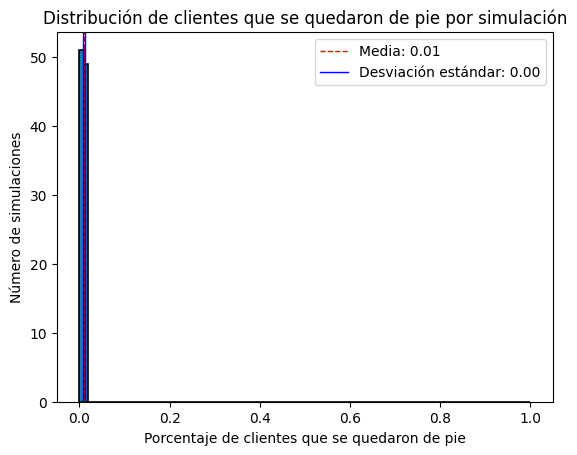

B(t) promedio: 0.8027777673726157
Qs(t) promedio: 2.1090804540227013
Qp(t) promedio: 0.04017700885044252
D(t) promedio: 2018.8890441515857


In [ ]:
import random
import math
from collections import deque
import matplotlib.pyplot as plt
import numpy as np
import time
from time import time


class Paciente:
    def __init__(self, tiempo_llegada):
        self.tiempo_llegada = tiempo_llegada
        self.tiempo_servicio = random.expovariate(1/720)  # Tiempo de servicio exponencial

class Evento:
    LLEGADA = 0
    INICIO_SERVICIO = 1
    FIN_SERVICIO = 2

class SimuladorClinica:
    random.seed()
    def __init__(self):
        self.tiempo_actual = 0
        self.tasa_llegada = None
        self.capacidad_asientos = None
        self.pacientes_con_silla = deque()
        self.pacientes_de_pie = deque()
        self.paciente_actual = None
        self.eventos = []
        self.contador_sentados = 0
        self.contador_de_pie = 0
        self.servidor_ocupado = 0  # Variable para registrar el tiempo en que el servidor está ocupado
        self.tiempo_servidor_ocupado = 0  # Variable para registrar el tiempo total en que el servidor está ocupado
        self.Qs = []  # Lista para almacenar la cantidad de pacientes sentados en cada evento
        self.Qp = []  # Lista para almacenar la cantidad de pacientes de pie en cada evento
        self.D = []   # Lista para almacenar los tiempos de espera de los pacientes



    def configurar_simulacion(self, tasa_llegada, capacidad_asientos):
        self.tasa_llegada = tasa_llegada
        self.capacidad_asientos = capacidad_asientos
        self.pacientes_con_silla = deque()
        self.contador_sentados = 0
        self.contador_de_pie = 0

    def llegada_paciente(self):
        nuevo_paciente = Paciente(self.tiempo_actual)
        if len(self.pacientes_con_silla) < self.capacidad_asientos:
            self.pacientes_con_silla.append(nuevo_paciente)
            #print(f"El paciente {round(self.tiempo_actual,2)} llegó a las {self.tiempo_actual} y se sentó")
            self.contador_sentados += 1
            if self.paciente_actual is None:
                self.programar_inicio_servicio()
        else:
            self.pacientes_de_pie.append(nuevo_paciente)
            #print(f"El paciente {round(self.tiempo_actual,2)} llegó a las {self.tiempo_actual} y se quedó de pie")
            self.contador_de_pie += 1
        self.Qs.append(len(self.pacientes_con_silla))  # Registrar la cantidad de pacientes sentados
        self.Qp.append(len(self.pacientes_de_pie))  # Registrar la cantidad de pacientes de pie
        self.programar_llegada()



    def inicio_servicio(self):
        if not self.pacientes_con_silla:
            return
        paciente_saliente = self.pacientes_con_silla.popleft()
        #print(f"El paciente empezó a ser atendido a las {self.tiempo_actual}")
        self.paciente_actual = paciente_saliente
        if len(self.pacientes_con_silla) < self.capacidad_asientos:
            if self.pacientes_de_pie:
                #print(f"El paciente {round(self.tiempo_actual,2)}  que estaba de pie ,se sentó")
                self.pacientes_con_silla.append(self.pacientes_de_pie.popleft())
        self.servidor_ocupado = 1  # Indicar que el servidor está ocupado
        self.programar_fin_servicio()


    def fin_servicio(self):
        if self.paciente_actual:
            tiempo_espera = self.tiempo_actual - self.paciente_actual.tiempo_llegada
            self.D.append(tiempo_espera)  # Registrar el tiempo de espera del paciente
            self.tiempo_servidor_ocupado += self.paciente_actual.tiempo_servicio  # Sumar el tiempo de servicio al tiempo total de ocupación del servidor
            self.paciente_actual = None
            #print(f"El paciente terminó de ser atendido a las {self.tiempo_actual}")
            if self.pacientes_con_silla:
                self.programar_inicio_servicio()  # Programar inicio de servicio para el próximo paciente sentado
                if self.pacientes_de_pie:
                    self.pacientes_con_silla.append(self.pacientes_de_pie.popleft())  # Mover paciente de pie a sentado
                    #print(f"El paciente {round(self.tiempo_actual,2)}  que estaba de pie ,se sentó")

    import numpy as np

    def programar_llegada(self):
        tiempo_llegada = self.tiempo_actual + np.random.poisson(1/self.tasa_llegada)
        #print(f"El siguiente paciente llegará a las {tiempo_llegada}")
        self.eventos.append((tiempo_llegada, Evento.LLEGADA))


    def programar_inicio_servicio(self):
        self.eventos.append((self.tiempo_actual, Evento.INICIO_SERVICIO))

    def programar_fin_servicio(self):
        if self.paciente_actual:
            tiempo_fin_servicio = self.tiempo_actual + self.paciente_actual.tiempo_servicio
            #print(f"El paciente terminará de ser atendido a las {tiempo_fin_servicio}")
            self.eventos.append((tiempo_fin_servicio, Evento.FIN_SERVICIO))
    def calcular_B_t(self, tiempo_simulacion):
        return self.tiempo_servidor_ocupado / tiempo_simulacion  # Calcular B(t)

    def calcular_Qs_t_promedio(self):
        return sum(self.Qs) / len(self.Qs)  # Calcular el promedio de Qs(t)

    def calcular_Qp_t_promedio(self):
        return sum(self.Qp) / len(self.Qp)  # Calcular el promedio de Qp(t)

    def calcular_D_t_promedio(self):
        return sum(self.D) / len(self.D)  # Calcular el promedio de D(t)
    def simular(self, tiempo_simulacion, semilla):
        random.seed(semilla)
        self.programar_llegada()
        while self.tiempo_actual < tiempo_simulacion:
            self.eventos.sort(key=lambda x: x[0])
            tiempo_evento, tipo_evento = self.eventos.pop(0)
            self.tiempo_actual = tiempo_evento
            if tipo_evento == Evento.LLEGADA:
                self.llegada_paciente()
            elif tipo_evento == Evento.INICIO_SERVICIO:
                self.inicio_servicio()
            elif tipo_evento == Evento.FIN_SERVICIO:
                self.fin_servicio()
        proporcion_de_pie = self.contador_de_pie / (self.contador_de_pie + self.contador_sentados)
        return proporcion_de_pie  # Devolver el porcentaje de personas que se quedaron de pie

def ejecutar_simulacion(num_simulaciones, tiempo_simulacion, tasa_llegada, capacidad_asientos, semilla_inicial=0):
    proporcion_de_sentados_resultados = []
    for i in range(num_simulaciones):
        # Generar una semilla única para cada simulación a partir de la semilla inicial
        semilla = random.randint(0, 2**31 - 1)  # Rango completo de valores de un entero de 32 bits
        simulador = SimuladorClinica()
        simulador.configurar_simulacion(tasa_llegada=tasa_llegada, capacidad_asientos=capacidad_asientos)
        proporcion_de_sentados = simulador.simular(tiempo_simulacion, semilla)
        proporcion_de_sentados_resultados.append(proporcion_de_sentados)
    return proporcion_de_sentados_resultados



numero_simulaciones = 100
tiempo_simulacion = 3600*10000
llegadas_por_hora = 4/3600
sillas = 9

resultados = ejecutar_simulacion(numero_simulaciones, tiempo_simulacion, llegadas_por_hora, sillas, semilla_inicial=int(time()))

print(f"Porcentaje de clientes que se quedaron de pie por simulación: {resultados}")
print(f"Promedio del porcentaje de clientes que se quedaron de pie: {sum(resultados) / len(resultados)}")

# Calcular media y desviación estándar
media = np.mean(resultados)
std = np.std(resultados)

print(f"Media: {media:.2f}")
print(f"Desviación estándar: {std:.2f}")


# Crear histograma con intervalos de 0.01
plt.hist(resultados, bins=np.arange(0, 1.01, 0.01), edgecolor='black', linewidth=1.2)

# Resto del código para configurar y mostrar el histograma


# Dibujar la media como una línea punteada
plt.axvline(media, color='r', linestyle='--', linewidth=1, label=f'Media: {media:.2f}')

# Dibujar la desviación estándar paralelamente ubicada a la media
plt.axvline(media + std, color='b', linestyle='-', linewidth=1, label=f'Desviación estándar: {std:.2f}')
plt.axvline(media - std, color='b', linestyle='-', linewidth=1)

# Configurar ejes y título
plt.xlabel('Porcentaje de clientes que se quedaron de pie')
plt.ylabel('Número de simulaciones')
plt.title('Distribución de clientes que se quedaron de pie por simulación')
plt.legend()

# Mostrar la gráfica
plt.show()

# Crear simulador y ejecutar simulación
simulador = SimuladorClinica()
simulador.configurar_simulacion(tasa_llegada=llegadas_por_hora, capacidad_asientos=sillas)
simulador.simular(tiempo_simulacion, semilla=int(time()))

# Calcular y mostrar medidas adicionales
B_t = simulador.calcular_B_t(tiempo_simulacion)
Qs_t_promedio = simulador.calcular_Qs_t_promedio()
Qp_t_promedio = simulador.calcular_Qp_t_promedio()
D_t_promedio = simulador.calcular_D_t_promedio()

print(f"B(t) promedio: {B_t}")
print(f"Qs(t) promedio: {Qs_t_promedio}")
print(f"Qp(t) promedio: {Qp_t_promedio}")
print(f"D(t) promedio: {D_t_promedio}")

Prueba poisson


### EJECUTAME

Porcentaje de clientes que se quedaron de pie por simulación: [0.095325, 0.09734513274336283, 0.09240231005775144, 0.1077203768963535, 0.11092785566134393, 0.10226334875578341, 0.09488813898262717, 0.09244957636649921, 0.112125, 0.10181781811817069, 0.09125446774475743, 0.11470985155195682, 0.0786382042693596, 0.09857253568660783, 0.10238404638144742, 0.08787939396969849, 0.09555, 0.09566805062278025, 0.0974, 0.09111816613753969, 0.09557977898894945, 0.10035, 0.09479052094790522, 0.09258842644669417, 0.10217244568885778, 0.081214848143982, 0.0928541078257392, 0.11201400175021878, 0.08680651048828662, 0.09080229942514371, 0.10301651963111988, 0.09143642955369422, 0.092575, 0.09348364036293648, 0.10143732033495813, 0.09694349336465649, 0.10135253381334533, 0.1120665950053746, 0.08720218005450137, 0.0923, 0.08123718557783667, 0.08687934396719836, 0.1017, 0.10651434856514348, 0.08412686511209418, 0.10678131327017772, 0.11908988623577947, 0.09885, 0.10797769944248606, 0.10370777808335625, 0

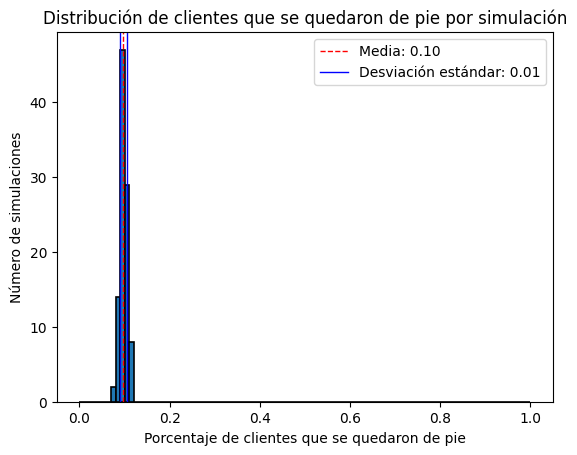

B(t) promedio: 0.7996350516683087
Qs(t) promedio: 1.8050097495125244
Qp(t) promedio: 0.27158642067896605
D(t) promedio: 1948.254464811386


In [ ]:
import random
from scipy.stats import t
import math
from collections import deque
import matplotlib.pyplot as plt
import numpy as np
import time
from time import time


class Paciente:
    def __init__(self, tiempo_llegada):
        self.tiempo_llegada = tiempo_llegada
        self.tiempo_servicio = random.expovariate(1/720)  # Tiempo de servicio exponencial

class Evento:
    LLEGADA = 0
    INICIO_SERVICIO = 1
    FIN_SERVICIO = 2

class SimuladorClinica:
    random.seed()
    def __init__(self):
        self.tiempo_actual = 0
        self.tasa_llegada = None
        self.capacidad_asientos = None
        self.pacientes_con_silla = deque()
        self.pacientes_de_pie = deque()
        self.paciente_actual = None
        self.eventos = []
        self.contador_sentados = 0
        self.contador_de_pie = 0
        self.servidor_ocupado = 0  # Variable para registrar el tiempo en que el servidor está ocupado
        self.tiempo_servidor_ocupado = 0  # Variable para registrar el tiempo total en que el servidor está ocupado
        self.Qs = []  # Lista para almacenar la cantidad de pacientes sentados en cada evento
        self.Qp = []  # Lista para almacenar la cantidad de pacientes de pie en cada evento
        self.D = []   # Lista para almacenar los tiempos de espera de los pacientes

    def configurar_simulacion(self, tasa_llegada, capacidad_asientos):
        self.tasa_llegada = tasa_llegada
        self.capacidad_asientos = capacidad_asientos
        self.pacientes_con_silla = deque()
        self.contador_sentados = 0
        self.contador_de_pie = 0

    def llegada_paciente(self):
        nuevo_paciente = Paciente(self.tiempo_actual)
        if len(self.pacientes_con_silla) < self.capacidad_asientos:
            self.pacientes_con_silla.append(nuevo_paciente)
            #print(f"El paciente {round(self.tiempo_actual,2)} llegó a las {self.tiempo_actual} y se sentó")
            self.contador_sentados += 1
            if self.paciente_actual is None:
                self.programar_inicio_servicio()
        else:
            self.pacientes_de_pie.append(nuevo_paciente)
            #print(f"El paciente {round(self.tiempo_actual,2)} llegó a las {self.tiempo_actual} y se quedó de pie")
            self.contador_de_pie += 1
        self.Qs.append(len(self.pacientes_con_silla))  # Registrar la cantidad de pacientes sentados
        self.Qp.append(len(self.pacientes_de_pie))  # Registrar la cantidad de pacientes de pie
        self.programar_llegada()



    def inicio_servicio(self):
        if not self.pacientes_con_silla:
            return
        paciente_saliente = self.pacientes_con_silla.popleft()
        #print(f"El paciente empezó a ser atendido a las {self.tiempo_actual}")
        self.paciente_actual = paciente_saliente
        if len(self.pacientes_con_silla) < self.capacidad_asientos:
            if self.pacientes_de_pie:
                #print(f"El paciente {round(self.tiempo_actual,2)}  que estaba de pie ,se sentó")
                self.pacientes_con_silla.append(self.pacientes_de_pie.popleft())
        self.servidor_ocupado = 1  # Indicar que el servidor está ocupado
        self.programar_fin_servicio()


    def fin_servicio(self):
        if self.paciente_actual:
            tiempo_espera = self.tiempo_actual - self.paciente_actual.tiempo_llegada
            self.D.append(tiempo_espera)  # Registrar el tiempo de espera del paciente
            self.tiempo_servidor_ocupado += self.paciente_actual.tiempo_servicio  # Sumar el tiempo de servicio al tiempo total de ocupación del servidor
            self.paciente_actual = None
            #print(f"El paciente terminó de ser atendido a las {self.tiempo_actual}")
            if self.pacientes_con_silla:
                self.programar_inicio_servicio()  # Programar inicio de servicio para el próximo paciente sentado
                if self.pacientes_de_pie:
                    self.pacientes_con_silla.append(self.pacientes_de_pie.popleft())  # Mover paciente de pie a sentado
                    #print(f"El paciente {round(self.tiempo_actual,2)}  que estaba de pie ,se sentó")

    def programar_llegada(self):
        tiempo_llegada = self.tiempo_actual + np.random.poisson(1/self.tasa_llegada)
        #print(f"El siguiente paciente llegará a las {tiempo_llegada}")
        self.eventos.append((tiempo_llegada, Evento.LLEGADA))
    def programar_inicio_servicio(self):
        self.eventos.append((self.tiempo_actual, Evento.INICIO_SERVICIO))

    def programar_fin_servicio(self):
        if self.paciente_actual:
            tiempo_fin_servicio = self.tiempo_actual + self.paciente_actual.tiempo_servicio
            #print(f"El paciente terminará de ser atendido a las {tiempo_fin_servicio}")
            self.eventos.append((tiempo_fin_servicio, Evento.FIN_SERVICIO))
    def calcular_B_t(self, tiempo_simulacion):
        return self.tiempo_servidor_ocupado / tiempo_simulacion  # Calcular B(t)

    def calcular_Qs_t_promedio(self):
        return sum(self.Qs) / len(self.Qs)  # Calcular el promedio de Qs(t)

    def calcular_Qp_t_promedio(self):
        return sum(self.Qp) / len(self.Qp)  # Calcular el promedio de Qp(t)

    def calcular_D_t_promedio(self):
        return sum(self.D) / len(self.D)  # Calcular el promedio de D(t)
    def simular(self, tiempo_simulacion, semilla):
        random.seed(semilla)
        self.programar_llegada()
        while self.tiempo_actual < tiempo_simulacion:
            self.eventos.sort(key=lambda x: x[0])
            tiempo_evento, tipo_evento = self.eventos.pop(0)
            self.tiempo_actual = tiempo_evento
            if tipo_evento == Evento.LLEGADA:
                self.llegada_paciente()
            elif tipo_evento == Evento.INICIO_SERVICIO:
                self.inicio_servicio()
            elif tipo_evento == Evento.FIN_SERVICIO:
                self.fin_servicio()
        proporcion_de_pie = self.contador_de_pie / (self.contador_de_pie + self.contador_sentados)
        return proporcion_de_pie  # Devolver el porcentaje de personas que se quedaron de pie

def ejecutar_simulacion(num_simulaciones, tiempo_simulacion, tasa_llegada, capacidad_asientos, semilla_inicial=0):
    proporcion_de_sentados_resultados = []
    for i in range(num_simulaciones):
        # Generar una semilla única para cada simulación a partir de la semilla inicial
        semilla = random.randint(0, 2**31 - 1)  # Rango completo de valores de un entero de 32 bits
        simulador = SimuladorClinica()
        simulador.configurar_simulacion(tasa_llegada=tasa_llegada, capacidad_asientos=capacidad_asientos)
        proporcion_de_sentados = simulador.simular(tiempo_simulacion, semilla)
        proporcion_de_sentados_resultados.append(proporcion_de_sentados)
    return proporcion_de_sentados_resultados



numero_simulaciones = 100
tiempo_simulacion = 3600*10000
llegadas_por_hora = 4/3600
sillas = 4
confianza = 0.99

resultados = ejecutar_simulacion(numero_simulaciones, tiempo_simulacion, llegadas_por_hora, sillas, semilla_inicial=int(time()))

print(f"Porcentaje de clientes que se quedaron de pie por simulación: {resultados}")
print(f"Promedio del porcentaje de clientes que se quedaron de pie: {sum(resultados) / len(resultados)}")

# Calcular media y desviación estándar
media = np.mean(resultados)
std = np.std(resultados)

print(f"Media: {media:.2f}")
print(f"Desviación estándar: {std:.2f}")


##t student inicio
grados_libertad = numero_simulaciones - 1

#Calcular el valor crítico de la distribución t
valor_critico = t.ppf(1 - (1 - confianza) / 2, df=grados_libertad)
# Calcular el error estándar de la media
error_estandar = std / np.sqrt(numero_simulaciones)

# Calcular el intervalo de confianza
intervalo = valor_critico * error_estandar

# Calcular el intervalo de confianza
intervalo_de_confianza = (media - intervalo, media + intervalo)

# Imprimir el intervalo de confianza
print(f"Intervalo de confianza (99%): {intervalo_de_confianza}")

## t student fin

# Crear histograma con intervalos de 0.01
plt.hist(resultados, bins=np.arange(0, 1.01, 0.01), edgecolor='black', linewidth=1.2)

# Resto del código para configurar y mostrar el histograma


# Dibujar la media como una línea punteada
plt.axvline(media, color='r', linestyle='--', linewidth=1, label=f'Media: {media:.2f}')

# Dibujar la desviación estándar paralelamente ubicada a la media
plt.axvline(media + std, color='b', linestyle='-', linewidth=1, label=f'Desviación estándar: {std:.2f}')
plt.axvline(media - std, color='b', linestyle='-', linewidth=1)

# Configurar ejes y título
plt.xlabel('Porcentaje de clientes que se quedaron de pie')
plt.ylabel('Número de simulaciones')
plt.title('Distribución de clientes que se quedaron de pie por simulación')
plt.legend()

# Mostrar la gráfica
plt.show()

# Crear simulador y ejecutar simulación
simulador = SimuladorClinica()
simulador.configurar_simulacion(tasa_llegada=llegadas_por_hora, capacidad_asientos=sillas)
simulador.simular(tiempo_simulacion, semilla=int(time()))

# Calcular y mostrar medidas adicionales
B_t = simulador.calcular_B_t(tiempo_simulacion)
Qs_t_promedio = simulador.calcular_Qs_t_promedio()
Qp_t_promedio = simulador.calcular_Qp_t_promedio()
D_t_promedio = simulador.calcular_D_t_promedio()

print(f"B(t) promedio: {B_t}")
print(f"Qs(t) promedio: {Qs_t_promedio}")
print(f"Qp(t) promedio: {Qp_t_promedio}")
print(f"D(t) promedio: {D_t_promedio}")

Prueba poisson lamb=tasa

Porcentaje de clientes que se quedaron de pie por simulación: [0.9999998458418395, 0.9999998453934245, 0.9999998457497103, 0.9999998462584283, 0.9999998458398243, 0.999999845903285, 0.9999998464461937, 0.999999846271328, 0.9999998459915307, 0.9999998473342531]
Promedio del porcentaje de clientes que se quedaron de pie: 0.9999998461029819
Media: 1.00
Desviación estándar: 0.00


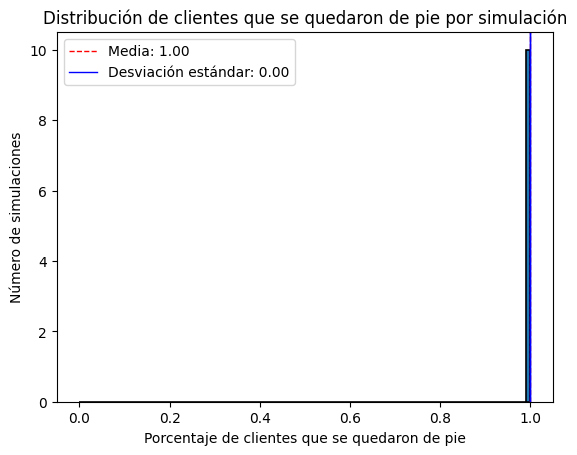

B(t) promedio: 0.9944988199054233
Qs(t) promedio: 3.9999997206062483
Qp(t) promedio: 16106274.802075883
D(t) promedio: 19630.18393212907


In [ ]:
import random
import math
from collections import deque
import matplotlib.pyplot as plt
import numpy as np
import time
from time import time


class Paciente:
    def __init__(self, tiempo_llegada):
        self.tiempo_llegada = tiempo_llegada
        self.tiempo_servicio = random.expovariate(1/720)  # Tiempo de servicio exponencial

class Evento:
    LLEGADA = 0
    INICIO_SERVICIO = 1
    FIN_SERVICIO = 2

class SimuladorClinica:
    random.seed()
    def __init__(self):
        self.tiempo_actual = 0
        self.tasa_llegada = None
        self.capacidad_asientos = None
        self.pacientes_con_silla = deque()
        self.pacientes_de_pie = deque()
        self.paciente_actual = None
        self.eventos = []
        self.contador_sentados = 0
        self.contador_de_pie = 0
        self.servidor_ocupado = 0  # Variable para registrar el tiempo en que el servidor está ocupado
        self.tiempo_servidor_ocupado = 0  # Variable para registrar el tiempo total en que el servidor está ocupado
        self.Qs = []  # Lista para almacenar la cantidad de pacientes sentados en cada evento
        self.Qp = []  # Lista para almacenar la cantidad de pacientes de pie en cada evento
        self.D = []   # Lista para almacenar los tiempos de espera de los pacientes

    def configurar_simulacion(self, tasa_llegada, capacidad_asientos):
        self.tasa_llegada = tasa_llegada
        self.capacidad_asientos = capacidad_asientos
        self.pacientes_con_silla = deque()
        self.contador_sentados = 0
        self.contador_de_pie = 0

    def llegada_paciente(self):
        nuevo_paciente = Paciente(self.tiempo_actual)
        if len(self.pacientes_con_silla) < self.capacidad_asientos:
            self.pacientes_con_silla.append(nuevo_paciente)
            #print(f"El paciente {round(self.tiempo_actual,2)} llegó a las {self.tiempo_actual} y se sentó")
            self.contador_sentados += 1
            if self.paciente_actual is None:
                self.programar_inicio_servicio()
        else:
            self.pacientes_de_pie.append(nuevo_paciente)
            #print(f"El paciente {round(self.tiempo_actual,2)} llegó a las {self.tiempo_actual} y se quedó de pie")
            self.contador_de_pie += 1
        self.Qs.append(len(self.pacientes_con_silla))  # Registrar la cantidad de pacientes sentados
        self.Qp.append(len(self.pacientes_de_pie))  # Registrar la cantidad de pacientes de pie
        self.programar_llegada()



    def inicio_servicio(self):
        if not self.pacientes_con_silla:
            return
        paciente_saliente = self.pacientes_con_silla.popleft()
        #print(f"El paciente empezó a ser atendido a las {self.tiempo_actual}")
        self.paciente_actual = paciente_saliente
        if len(self.pacientes_con_silla) < self.capacidad_asientos:
            if self.pacientes_de_pie:
                #print(f"El paciente {round(self.tiempo_actual,2)}  que estaba de pie ,se sentó")
                self.pacientes_con_silla.append(self.pacientes_de_pie.popleft())
        self.servidor_ocupado = 1  # Indicar que el servidor está ocupado
        self.programar_fin_servicio()


    def fin_servicio(self):
        if self.paciente_actual:
            tiempo_espera = self.tiempo_actual - self.paciente_actual.tiempo_llegada
            self.D.append(tiempo_espera)  # Registrar el tiempo de espera del paciente
            self.tiempo_servidor_ocupado += self.paciente_actual.tiempo_servicio  # Sumar el tiempo de servicio al tiempo total de ocupación del servidor
            self.paciente_actual = None
            #print(f"El paciente terminó de ser atendido a las {self.tiempo_actual}")
            if self.pacientes_con_silla:
                self.programar_inicio_servicio()  # Programar inicio de servicio para el próximo paciente sentado
                if self.pacientes_de_pie:
                    self.pacientes_con_silla.append(self.pacientes_de_pie.popleft())  # Mover paciente de pie a sentado
                    #print(f"El paciente {round(self.tiempo_actual,2)}  que estaba de pie ,se sentó")

    def programar_llegada(self):
        #tiempo_llegada = self.tiempo_actual + np.random.poisson(1/self.tasa_llegada)
        tiempo_llegada = self.tiempo_actual + np.random.poisson(lam=self.tasa_llegada)
        #print(f"El siguiente paciente llegará a las {tiempo_llegada}")
        self.eventos.append((tiempo_llegada, Evento.LLEGADA))
    def programar_inicio_servicio(self):
        self.eventos.append((self.tiempo_actual, Evento.INICIO_SERVICIO))

    def programar_fin_servicio(self):
        if self.paciente_actual:
            tiempo_fin_servicio = self.tiempo_actual + self.paciente_actual.tiempo_servicio
            #print(f"El paciente terminará de ser atendido a las {tiempo_fin_servicio}")
            self.eventos.append((tiempo_fin_servicio, Evento.FIN_SERVICIO))
    def calcular_B_t(self, tiempo_simulacion):
        return self.tiempo_servidor_ocupado / tiempo_simulacion  # Calcular B(t)

    def calcular_Qs_t_promedio(self):
        return sum(self.Qs) / len(self.Qs)  # Calcular el promedio de Qs(t)

    def calcular_Qp_t_promedio(self):
        return sum(self.Qp) / len(self.Qp)  # Calcular el promedio de Qp(t)

    def calcular_D_t_promedio(self):
        return sum(self.D) / len(self.D)  # Calcular el promedio de D(t)
    def simular(self, tiempo_simulacion, semilla):
        random.seed(semilla)
        self.programar_llegada()
        while self.tiempo_actual < tiempo_simulacion:
            self.eventos.sort(key=lambda x: x[0])
            tiempo_evento, tipo_evento = self.eventos.pop(0)
            self.tiempo_actual = tiempo_evento
            if tipo_evento == Evento.LLEGADA:
                self.llegada_paciente()
            elif tipo_evento == Evento.INICIO_SERVICIO:
                self.inicio_servicio()
            elif tipo_evento == Evento.FIN_SERVICIO:
                self.fin_servicio()
        proporcion_de_pie = self.contador_de_pie / (self.contador_de_pie + self.contador_sentados)
        return proporcion_de_pie  # Devolver el porcentaje de personas que se quedaron de pie

def ejecutar_simulacion(num_simulaciones, tiempo_simulacion, tasa_llegada, capacidad_asientos, semilla_inicial=0):
    proporcion_de_sentados_resultados = []
    for i in range(num_simulaciones):
        # Generar una semilla única para cada simulación a partir de la semilla inicial
        semilla = random.randint(0, 2**31 - 1)  # Rango completo de valores de un entero de 32 bits
        simulador = SimuladorClinica()
        simulador.configurar_simulacion(tasa_llegada=tasa_llegada, capacidad_asientos=capacidad_asientos)
        proporcion_de_sentados = simulador.simular(tiempo_simulacion, semilla)
        proporcion_de_sentados_resultados.append(proporcion_de_sentados)
    return proporcion_de_sentados_resultados



numero_simulaciones = 10
tiempo_simulacion = 3600*10
llegadas_por_hora = 4/3600
sillas = 4

resultados = ejecutar_simulacion(numero_simulaciones, tiempo_simulacion, llegadas_por_hora, sillas, semilla_inicial=int(time()))

print(f"Porcentaje de clientes que se quedaron de pie por simulación: {resultados}")
print(f"Promedio del porcentaje de clientes que se quedaron de pie: {sum(resultados) / len(resultados)}")

# Calcular media y desviación estándar
media = np.mean(resultados)
std = np.std(resultados)

print(f"Media: {media:.2f}")
print(f"Desviación estándar: {std:.2f}")


# Crear histograma con intervalos de 0.01
plt.hist(resultados, bins=np.arange(0, 1.01, 0.01), edgecolor='black', linewidth=1.2)

# Resto del código para configurar y mostrar el histograma


# Dibujar la media como una línea punteada
plt.axvline(media, color='r', linestyle='--', linewidth=1, label=f'Media: {media:.2f}')

# Dibujar la desviación estándar paralelamente ubicada a la media
plt.axvline(media + std, color='b', linestyle='-', linewidth=1, label=f'Desviación estándar: {std:.2f}')
plt.axvline(media - std, color='b', linestyle='-', linewidth=1)

# Configurar ejes y título
plt.xlabel('Porcentaje de clientes que se quedaron de pie')
plt.ylabel('Número de simulaciones')
plt.title('Distribución de clientes que se quedaron de pie por simulación')
plt.legend()

# Mostrar la gráfica
plt.show()

# Crear simulador y ejecutar simulación
simulador = SimuladorClinica()
simulador.configurar_simulacion(tasa_llegada=llegadas_por_hora, capacidad_asientos=sillas)
simulador.simular(tiempo_simulacion, semilla=int(time()))

# Calcular y mostrar medidas adicionales
B_t = simulador.calcular_B_t(tiempo_simulacion)
Qs_t_promedio = simulador.calcular_Qs_t_promedio()
Qp_t_promedio = simulador.calcular_Qp_t_promedio()
D_t_promedio = simulador.calcular_D_t_promedio()

print(f"B(t) promedio: {B_t}")
print(f"Qs(t) promedio: {Qs_t_promedio}")
print(f"Qp(t) promedio: {Qp_t_promedio}")
print(f"D(t) promedio: {D_t_promedio}")

Detalles finales

Porcentaje de clientes que se quedaron de pie por simulación: [0.09131826365273055, 0.10898542026158502, 0.10138513851385139, 0.09316397459618943, 0.09867220124528019, 0.10081239845019373, 0.10464476776161193, 0.09915269064460497, 0.11464713382165446, 0.09558345420897314, 0.10312937412517496, 0.09492974648732437, 0.09831762617803665, 0.0951952402379881, 0.10698930106989302, 0.09584281178911581, 0.09965996599659965, 0.09702742568564214, 0.081825, 0.10731878078663766, 0.12008799120087991, 0.1054289929730676, 0.10167966406718656, 0.10083760470058757, 0.10745268631715793, 0.09854470894178836, 0.10096009600960096, 0.09819509024548773, 0.10105, 0.09892005399730014, 0.1008275206880172, 0.10723927607239277, 0.095525, 0.11263592050993626, 0.09654275929305302, 0.09982000899955003, 0.0988271774738053, 0.099917485559973, 0.10431349027840256, 0.08248324832483249, 0.10174745631359217, 0.09081364829396325, 0.10062248443788906, 0.10026998650067497, 0.10341724370672199, 0.10179535907181436, 0.092061507

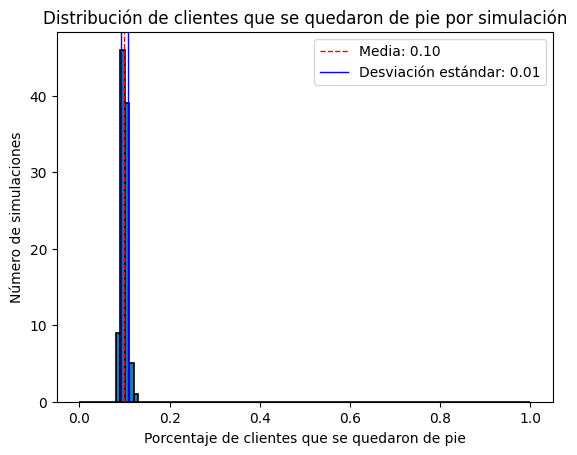

B(t) promedio: 0.8032287707531334
Qs(t) promedio: 1.8264706617665443
Qp(t) promedio: 0.30490762269056726
D(t) promedio: 2004.7560808976723


In [ ]:
import random
import math
from collections import deque
import matplotlib.pyplot as plt
import numpy as np
import time
from time import time

class Paciente:
    def __init__(self, tiempo_llegada):
        self.tiempo_llegada = tiempo_llegada
        self.tiempo_servicio = random.expovariate(1/720)  # Tiempo de servicio exponencial

class Evento:
    LLEGADA = 0
    INICIO_SERVICIO = 1
    FIN_SERVICIO = 2

class SimuladorClinica:
    random.seed()
    def __init__(self):
        self.tiempo_actual = 0
        self.tasa_llegada = None
        self.capacidad_asientos = None
        self.pacientes_con_silla = deque()
        self.pacientes_de_pie = deque()
        self.paciente_actual = None
        self.eventos = []
        self.contador_sentados = 0
        self.contador_de_pie = 0
        self.servidor_ocupado = 0  # Variable para registrar el tiempo en que el servidor está ocupado
        self.tiempo_servidor_ocupado = 0  # Variable para registrar el tiempo total en que el servidor está ocupado
        self.Qs_t = []  # Lista para almacenar la cantidad de pacientes sentados en cada evento
        self.Qp_t = []  # Lista para almacenar la cantidad de pacientes de pie en cada evento
        self.D = []   # Lista para almacenar los tiempos de espera de los pacientes

    def configurar_simulacion(self, tasa_llegada, capacidad_asientos):
        self.tasa_llegada = tasa_llegada
        self.capacidad_asientos = capacidad_asientos
        self.pacientes_con_silla = deque()
        self.contador_sentados = 0
        self.contador_de_pie = 0

    def llegada_paciente(self):
        nuevo_paciente = Paciente(self.tiempo_actual)
        if len(self.pacientes_con_silla) < self.capacidad_asientos:
            self.pacientes_con_silla.append(nuevo_paciente)
            self.contador_sentados += 1
            if self.paciente_actual is None:
                self.programar_inicio_servicio()
        else:
            self.pacientes_de_pie.append(nuevo_paciente)
            self.contador_de_pie += 1
        self.Qs_t.append(len(self.pacientes_con_silla))  # Registrar la cantidad de pacientes sentados
        self.Qp_t.append(len(self.pacientes_de_pie))  # Registrar la cantidad de pacientes de pie
        self.programar_llegada()

    def inicio_servicio(self):
        if not self.pacientes_con_silla:
            return
        paciente_saliente = self.pacientes_con_silla.popleft()
        self.paciente_actual = paciente_saliente
        if len(self.pacientes_con_silla) < self.capacidad_asientos:
            if self.pacientes_de_pie:
                self.pacientes_con_silla.append(self.pacientes_de_pie.popleft())
        self.servidor_ocupado = 1  # Indicar que el servidor está ocupado
        self.programar_fin_servicio()

    def fin_servicio(self):
        if self.paciente_actual:
            tiempo_espera = self.tiempo_actual - self.paciente_actual.tiempo_llegada
            self.D.append(tiempo_espera)  # Registrar el tiempo de espera del paciente
            self.tiempo_servidor_ocupado += self.paciente_actual.tiempo_servicio  # Sumar el tiempo de servicio al tiempo total de ocupación del servidor
            self.paciente_actual = None
            if self.pacientes_con_silla:
                self.programar_inicio_servicio()  # Programar inicio de servicio para el próximo paciente sentado
                if self.pacientes_de_pie:
                    self.pacientes_con_silla.append(self.pacientes_de_pie.popleft())  # Mover paciente de pie a sentado

    def programar_llegada(self):
        tiempo_llegada = self.tiempo_actual + np.random.poisson(1/self.tasa_llegada)
        self.eventos.append((tiempo_llegada, Evento.LLEGADA))

    def programar_inicio_servicio(self):
        self.eventos.append((self.tiempo_actual, Evento.INICIO_SERVICIO))

    def programar_fin_servicio(self):
        if self.paciente_actual:
            tiempo_fin_servicio = self.tiempo_actual + self.paciente_actual.tiempo_servicio
            self.eventos.append((tiempo_fin_servicio, Evento.FIN_SERVICIO))

    def calcular_B_t(self, tiempo_simulacion):
        return self.tiempo_servidor_ocupado / tiempo_simulacion if tiempo_simulacion > 0 else 0

    def calcular_Qs_t_promedio(self):
        return sum(self.Qs_t) / len(self.Qs_t) if len(self.Qs_t) > 0 else 0

    def calcular_Qp_t_promedio(self):
        return sum(self.Qp_t) / len(self.Qp_t) if len(self.Qp_t) > 0 else 0

    def calcular_D_t_promedio(self):
        return sum(self.D) / len(self.D) if len(self.D) > 0 else 0

    def simular(self, tiempo_simulacion, semilla):
        random.seed(semilla)
        self.programar_llegada()
        while self.tiempo_actual < tiempo_simulacion:
            self.eventos.sort(key=lambda x: x[0])
            tiempo_evento, tipo_evento = self.eventos.pop(0)
            self.tiempo_actual = tiempo_evento
            if tipo_evento == Evento.LLEGADA:
                self.llegada_paciente()
            elif tipo_evento == Evento.INICIO_SERVICIO:
                self.inicio_servicio()
            elif tipo_evento == Evento.FIN_SERVICIO:
                self.fin_servicio()
        proporcion_de_pie = self.contador_de_pie / (self.contador_de_pie + self.contador_sentados)
        return proporcion_de_pie

def ejecutar_simulacion(num_simulaciones, tiempo_simulacion, tasa_llegada, capacidad_asientos, semilla_inicial=0):
    proporcion_de_sentados_resultados = []
    for i in range(num_simulaciones):
        semilla = random.randint(0, 2**31 - 1)
        simulador = SimuladorClinica()
        simulador.configurar_simulacion(tasa_llegada=tasa_llegada, capacidad_asientos=capacidad_asientos)
        proporcion_de_sentados = simulador.simular(tiempo_simulacion, semilla)
        proporcion_de_sentados_resultados.append(proporcion_de_sentados)
    return proporcion_de_sentados_resultados

numero_simulaciones = 100
tiempo_simulacion = 3600*10000
llegadas_por_hora = 4/3600
sillas = 4

# Ejecutar simulaciones
resultados = ejecutar_simulacion(numero_simulaciones, tiempo_simulacion, llegadas_por_hora, sillas, semilla_inicial=int(time()))

# Calcular y mostrar resultados
print(f"Porcentaje de clientes que se quedaron de pie por simulación: {resultados}")
print(f"Promedio del porcentaje de clientes que se quedaron de pie: {sum(resultados) / len(resultados)}")

# Calcular media y desviación estándar
media = np.mean(resultados)
std = np.std(resultados)

print(f"Media: {media:.2f}")
print(f"Desviación estándar: {std:.2f}")

# Crear histograma con intervalos de 0.01
plt.hist(resultados, bins=np.arange(0, 1.01, 0.01), edgecolor='black', linewidth=1.2)

# Dibujar la media como una línea punteada
plt.axvline(media, color='r', linestyle='--', linewidth=1, label=f'Media: {media:.2f}')

# Dibujar la desviación estándar
plt.axvline(media + std, color='b', linestyle='-', linewidth=1, label=f'Desviación estándar: {std:.2f}')
plt.axvline(media - std, color='b', linestyle='-', linewidth=1)

# Configurar ejes y título
plt.xlabel('Porcentaje de clientes que se quedaron de pie')
plt.ylabel('Número de simulaciones')
plt.title('Distribución de clientes que se quedaron de pie por simulación')
plt.legend()

# Mostrar la gráfica
plt.show()

# Crear simulador y ejecutar simulación
simulador = SimuladorClinica()
simulador.configurar_simulacion(tasa_llegada=llegadas_por_hora, capacidad_asientos=sillas)
simulador.simular(tiempo_simulacion, semilla=int(time()))

# Calcular y mostrar medidas adicionales
B_t = simulador.calcular_B_t(tiempo_simulacion)
Qs_t_promedio = simulador.calcular_Qs_t_promedio()
Qp_t_promedio = simulador.calcular_Qp_t_promedio()
D_t_promedio = simulador.calcular_D_t_promedio()

print(f"B(t) promedio: {B_t}")
print(f"Qs(t) promedio: {Qs_t_promedio}")
print(f"Qp(t) promedio: {Qp_t_promedio}")
print(f"D(t) promedio: {D_t_promedio}")


## más pruebas

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
from time import time

class Paciente:
    def __init__(self, tiempo_llegada):
        self.tiempo_llegada = tiempo_llegada
        self.tiempo_servicio = random.expovariate(1/720)  # Tiempo de servicio exponencial

class Evento:
    LLEGADA = 0
    INICIO_SERVICIO = 1
    FIN_SERVICIO = 2

class SimuladorClinica:
    random.seed()
    def __init__(self):
        self.tiempo_actual = 0
        self.tasa_llegada = None
        self.capacidad_asientos = None
        self.pacientes_con_silla = deque()
        self.pacientes_de_pie = deque()
        self.paciente_actual = None
        self.eventos = []
        self.contador_sentados = 0
        self.contador_de_pie = 0
        self.servidor_ocupado = 0  # Variable para registrar el tiempo en que el servidor está ocupado
        self.tiempo_servidor_ocupado = 0  # Variable para registrar el tiempo total en que el servidor está ocupado
        self.Qs_t = []  # Lista para almacenar la cantidad de pacientes sentados en cada evento
        self.Qp_t = []  # Lista para almacenar la cantidad de pacientes de pie en cada evento
        self.D = []   # Lista para almacenar los tiempos de espera de los pacientes

    def configurar_simulacion(self, tasa_llegada, capacidad_asientos):
        self.tasa_llegada = tasa_llegada
        self.capacidad_asientos = capacidad_asientos
        self.pacientes_con_silla = deque()
        self.contador_sentados = 0
        self.contador_de_pie = 0

    def llegada_paciente(self):
        nuevo_paciente = Paciente(self.tiempo_actual)
        if len(self.pacientes_con_silla) < self.capacidad_asientos:
            self.pacientes_con_silla.append(nuevo_paciente)
            self.contador_sentados += 1
            if self.paciente_actual is None:
                self.programar_inicio_servicio()
        else:
            self.pacientes_de_pie.append(nuevo_paciente)
            self.contador_de_pie += 1
        self.Qs_t.append(len(self.pacientes_con_silla))  # Registrar la cantidad de pacientes sentados
        self.Qp_t.append(len(self.pacientes_de_pie))  # Registrar la cantidad de pacientes de pie
        self.programar_llegada()

    def inicio_servicio(self):
        if not self.pacientes_con_silla:
            return
        paciente_saliente = self.pacientes_con_silla.popleft()
        self.paciente_actual = paciente_saliente
        if len(self.pacientes_con_silla) < self.capacidad_asientos:
            if self.pacientes_de_pie:
                self.pacientes_con_silla.append(self.pacientes_de_pie.popleft())
        self.servidor_ocupado = 1  # Indicar que el servidor está ocupado
        self.programar_fin_servicio()

    def fin_servicio(self):
        if self.paciente_actual:
            tiempo_espera = self.tiempo_actual - self.paciente_actual.tiempo_llegada
            self.D.append(tiempo_espera)  # Registrar el tiempo de espera del paciente
            self.tiempo_servidor_ocupado += self.paciente_actual.tiempo_servicio  # Sumar el tiempo de servicio al tiempo total de ocupación del servidor
            self.paciente_actual = None
            if self.pacientes_con_silla:
                self.programar_inicio_servicio()  # Programar inicio de servicio para el próximo paciente sentado
                if self.pacientes_de_pie:
                    self.pacientes_con_silla.append(self.pacientes_de_pie.popleft())  # Mover paciente de pie a sentado

    def programar_llegada(self):
        tiempo_llegada = self.tiempo_actual + np.random.poisson(1/self.tasa_llegada)
        self.eventos.append((tiempo_llegada, Evento.LLEGADA))

    def programar_inicio_servicio(self):
        self.eventos.append((self.tiempo_actual, Evento.INICIO_SERVICIO))

    def programar_fin_servicio(self):
        if self.paciente_actual:
            tiempo_fin_servicio = self.tiempo_actual + self.paciente_actual.tiempo_servicio
            self.eventos.append((tiempo_fin_servicio, Evento.FIN_SERVICIO))

    def calcular_B_t(self, tiempo_simulacion):
        return self.tiempo_servidor_ocupado / tiempo_simulacion if tiempo_simulacion > 0 else 0

    def calcular_Qs_t_promedio(self):
        return sum(self.Qs_t) / len(self.Qs_t) if len(self.Qs_t) > 0 else 0

    def calcular_Qp_t_promedio(self):
        return sum(self.Qp_t) / len(self.Qp_t) if len(self.Qp_t) > 0 else 0

    def calcular_D_t_promedio(self):
        return sum(self.D) / len(self.D) if len(self.D) > 0 else 0

    def simular(self, tiempo_simulacion, semilla):
        random.seed(semilla)
        self.programar_llegada()
        while self.tiempo_actual < tiempo_simulacion:
            self.eventos.sort(key=lambda x: x[0])
            tiempo_evento, tipo_evento = self.eventos.pop(0)
            self.tiempo_actual = tiempo_evento
            if tipo_evento == Evento.LLEGADA:
                self.llegada_paciente()
            elif tipo_evento == Evento.INICIO_SERVICIO:
                self.inicio_servicio()
            elif tipo_evento == Evento.FIN_SERVICIO:
                self.fin_servicio()
        proporcion_de_pie = self.contador_de_pie / (self.contador_de_pie + self.contador_sentados)
        return proporcion_de_pie

def ejecutar_simulacion(num_simulaciones, tiempo_simulacion, tasa_llegada, capacidad_asientos, semilla_inicial=0):
    resultados_por_simulacion = []
    for i in range(num_simulaciones):
        semilla = random.randint(0, 2**31 - 1)
        simulador = SimuladorClinica()
        simulador.configurar_simulacion(tasa_llegada=tasa_llegada, capacidad_asientos=capacidad_asientos)
        proporcion_de_sentados = simulador.simular(tiempo_simulacion, semilla)
        B_t = simulador.calcular_B_t(tiempo_simulacion)
        Qs_t_promedio = simulador.calcular_Qs_t_promedio()
        Qp_t_promedio = simulador.calcular_Qp_t_promedio()
        D_t_promedio = simulador.calcular_D_t_promedio()
        resultados_por_simulacion.append({
            'proporcion_de_sentados': proporcion_de_sentados,
            'B_t': B_t,
            'Qs_t_promedio': Qs_t_promedio,
            'Qp_t_promedio': Qp_t_promedio,
            'D_t_promedio': D_t_promedio
        })
    return resultados_por_simulacion

numero_simulaciones = 100
tiempo_simulacion = 3600*10000
llegadas_por_hora = 4/3600
sillas = 4

# Ejecutar simulaciones
resultados_por_simulacion = ejecutar_simulacion(numero_simulaciones, tiempo_simulacion, llegadas_por_hora, sillas, semilla_inicial=int(time()))

# Calcular medias y desviaciones estándar
proporcion_de_sentados = [res['proporcion_de_sentados'] for res in resultados_por_simulacion]
media_proporcion_de_sentados = np.mean(proporcion_de_sentados)
std_proporcion_de_sentados = np.std(proporcion_de_sentados)

B_t = [res['B_t'] for res in resultados_por_simulacion]
media_B_t = np.mean(B_t)
std_B_t = np.std(B_t)

Qs_t_promedio = [res['Qs_t_promedio'] for res in resultados_por_simulacion]
media_Qs_t_promedio = np.mean(Qs_t_promedio)
std_Qs_t_promedio = np.std(Qs_t_promedio)

Qp_t_promedio = [res['Qp_t_promedio'] for res in resultados_por_simulacion]
media_Qp_t_promedio = np.mean(Qp_t_promedio)
std_Qp_t_promedio = np.std(Qp_t_promedio)

D_t_promedio = [res['D_t_promedio'] for res in resultados_por_simulacion]
media_D_t_promedio = np.mean(D_t_promedio)
std_D_t_promedio = np.std(D_t_promedio)

# Calcular intervalos de confianza
confianza = 0.95
grados_libertad = numero_simulaciones - 1

intervalo_proporcion_de_sentados = 1.96 * std_proporcion_de_sentados / np.sqrt(numero_simulaciones)
intervalo_B_t = 1.96 * std_B_t / np.sqrt(numero_simulaciones)
intervalo_Qs_t_promedio = 1.96 * std_Qs_t_promedio / np.sqrt(numero_simulaciones)
intervalo_Qp_t_promedio = 1.96 * std_Qp_t_promedio / np.sqrt(numero_simulaciones)
intervalo_D_t_promedio = 1.96 * std_D_t_promedio / np.sqrt(numero_simulaciones)

print(f"Media proporción de clientes que se quedaron de pie: {media_proporcion_de_sentados:.2f} ± {intervalo_proporcion_de_sentados:.2f}")
print(f"Media B(t): {media_B_t:.2f} ± {intervalo_B_t:.2f}")
print(f"Media Qs(t) promedio: {media_Qs_t_promedio:.2f} ± {intervalo_Qs_t_promedio:.2f}")
print(f"Media Qp(t) promedio: {media_Qp_t_promedio:.2f} ± {intervalo_Qp_t_promedio:.2f}")
print(f"Media D(t) promedio: {media_D_t_promedio:.2f} ± {intervalo_D_t_promedio:.2f}")

intervalo_D_t_promedio = t.interval(confianza, df=grados_libertad, loc=media_D_t_promedio, scale=std_D_t_promedio/np.sqrt(numero_simulaciones))
intervalo_Qs_t_promedio = t.interval(confianza, df=grados_libertad, loc=media_Qs_t_promedio, scale=std_Qs_t_promedio/np.sqrt(numero_simulaciones))
intervalo_Qp_t_promedio = t.interval(confianza, df=grados_libertad, loc=media_Qp_t_promedio, scale=std_Qp_t_promedio/np.sqrt(numero_simulaciones))
intervalo_B_t = t.interval(confianza, df=grados_libertad, loc=media_B_t, scale=std_B_t/np.sqrt(numero_simulaciones))

print(f"Intervalo de confianza para D(t) promedio: {intervalo_D_t_promedio}")
print(f"Intervalo de confianza para Qs(t) promedio: {intervalo_Qs_t_promedio}")
print(f"Intervalo de confianza para Qp(t) promedio: {intervalo_Qp_t_promedio}")
print(f"Intervalo de confianza para B(t): {intervalo_B_t}")


Media proporción de clientes que se quedaron de pie: 0.10 ± 0.00
Media B(t): 0.80 ± 0.00
Media Qs(t) promedio: 1.80 ± 0.00
Media Qp(t) promedio: 0.27 ± 0.01
Media D(t) promedio: 1935.92 ± 10.94
Intervalo de confianza para D(t) promedio: (1924.8498690620554, 1946.9902432738832)
Intervalo de confianza para Qs(t) promedio: (1.792080936365419, 1.8020767329369007)
Intervalo de confianza para Qp(t) promedio: (0.258255034185533, 0.27217526348299503)
Intervalo de confianza para B(t): (0.7986463097822817, 0.8001430027884323)


Porcentaje de clientes que se quedaron de pie por simulación: [0.04037197210209234, 0.0472, 0.03259511073338999, 0.03992899289928993, 0.050068741407324084, 0.030127259544465834, 0.030377278295872192, 0.04999750012499375, 0.034725, 0.03381992701094836, 0.04612615315382885, 0.04492275386230688, 0.05032374190645234, 0.04438498662198995, 0.039494075888616705, 0.03531793641271746, 0.03784905377365566, 0.048009601920384073, 0.053616957456381543, 0.047385784264720586, 0.04380109502737568, 0.0351609356257497, 0.054987627783748654, 0.035946405359464056, 0.03487064116985377, 0.0277, 0.04143121468220233, 0.037426871343567175, 0.031830901459124525, 0.035783051186516965, 0.02604804639652026, 0.04060304522839213, 0.03519912002199945, 0.0423728813559322, 0.052018497687789024, 0.04809759512024399, 0.03939507561554806, 0.03340668133626725, 0.037074073148171294, 0.03854229154169166, 0.0297477689173312, 0.03845384538453846, 0.048734746949389875, 0.0441183822426636, 0.04964007198560288, 0.0442121583435444

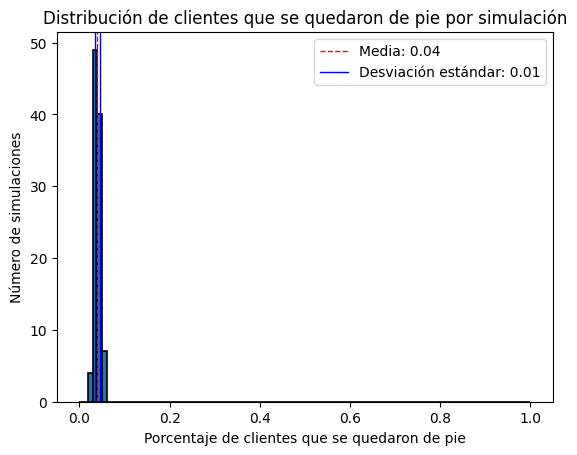

B(t) promedio: 0.8072422638171972
Qs(t) promedio: 1.983899194959748
Qp(t) promedio: 0.08605430271513576
D(t) promedio: 1956.6669252829672


In [ ]:
import random
import math
from collections import deque
import matplotlib.pyplot as plt
import numpy as np
import time
from time import time


class Paciente:
    def __init__(self, tiempo_llegada):
        self.tiempo_llegada = tiempo_llegada
        self.tiempo_servicio = random.expovariate(1/720)  # Tiempo de servicio exponencial

class Evento:
    LLEGADA = 0
    INICIO_SERVICIO = 1
    FIN_SERVICIO = 2

class SimuladorClinica:
    random.seed()
    def __init__(self):
        self.tiempo_actual = 0
        self.tasa_llegada = None
        self.capacidad_asientos = None
        self.pacientes_con_silla = deque()
        self.pacientes_de_pie = deque()
        self.paciente_actual = None
        self.eventos = []
        self.contador_sentados = 0
        self.contador_de_pie = 0
        self.servidor_ocupado = 0  # Variable para registrar el tiempo en que el servidor está ocupado
        self.tiempo_servidor_ocupado = 0  # Variable para registrar el tiempo total en que el servidor está ocupado
        self.Qs = []  # Lista para almacenar la cantidad de pacientes sentados en cada evento
        self.Qp = []  # Lista para almacenar la cantidad de pacientes de pie en cada evento
        self.D = []   # Lista para almacenar los tiempos de espera de los pacientes

    def configurar_simulacion(self, tasa_llegada, capacidad_asientos):
        self.tasa_llegada = tasa_llegada
        self.capacidad_asientos = capacidad_asientos
        self.pacientes_con_silla = deque()
        self.contador_sentados = 0
        self.contador_de_pie = 0

    def llegada_paciente(self):
        nuevo_paciente = Paciente(self.tiempo_actual)
        if len(self.pacientes_con_silla) < self.capacidad_asientos:
            self.pacientes_con_silla.append(nuevo_paciente)
            #print(f"El paciente {round(self.tiempo_actual,2)} llegó a las {self.tiempo_actual} y se sentó")
            self.contador_sentados += 1
            if self.paciente_actual is None:
                self.programar_inicio_servicio()
        else:
            self.pacientes_de_pie.append(nuevo_paciente)
            #print(f"El paciente {round(self.tiempo_actual,2)} llegó a las {self.tiempo_actual} y se quedó de pie")
            self.contador_de_pie += 1
        self.Qs.append(len(self.pacientes_con_silla))  # Registrar la cantidad de pacientes sentados
        self.Qp.append(len(self.pacientes_de_pie))  # Registrar la cantidad de pacientes de pie
        self.programar_llegada()



    def inicio_servicio(self):
        if not self.pacientes_con_silla:
            return
        paciente_saliente = self.pacientes_con_silla.popleft()
        #print(f"El paciente empezó a ser atendido a las {self.tiempo_actual}")
        self.paciente_actual = paciente_saliente
        if len(self.pacientes_con_silla) < self.capacidad_asientos:
            if self.pacientes_de_pie:
                #print(f"El paciente {round(self.tiempo_actual,2)}  que estaba de pie ,se sentó")
                self.pacientes_con_silla.append(self.pacientes_de_pie.popleft())
        self.servidor_ocupado = 1  # Indicar que el servidor está ocupado
        self.programar_fin_servicio()


    def fin_servicio(self):
        if self.paciente_actual:
            tiempo_espera = self.tiempo_actual - self.paciente_actual.tiempo_llegada
            self.D.append(tiempo_espera)  # Registrar el tiempo de espera del paciente
            self.tiempo_servidor_ocupado += self.paciente_actual.tiempo_servicio  # Sumar el tiempo de servicio al tiempo total de ocupación del servidor
            self.paciente_actual = None
            #print(f"El paciente terminó de ser atendido a las {self.tiempo_actual}")
            if self.pacientes_con_silla:
                self.programar_inicio_servicio()  # Programar inicio de servicio para el próximo paciente sentado
                if self.pacientes_de_pie:
                    self.pacientes_con_silla.append(self.pacientes_de_pie.popleft())  # Mover paciente de pie a sentado
                    #print(f"El paciente {round(self.tiempo_actual,2)}  que estaba de pie ,se sentó")

    def programar_llegada(self):
        tiempo_llegada = self.tiempo_actual + np.random.poisson(1/self.tasa_llegada)
        #print(f"El siguiente paciente llegará a las {tiempo_llegada}")
        self.eventos.append((tiempo_llegada, Evento.LLEGADA))
    def programar_inicio_servicio(self):
        self.eventos.append((self.tiempo_actual, Evento.INICIO_SERVICIO))

    def programar_fin_servicio(self):
        if self.paciente_actual:
            tiempo_fin_servicio = self.tiempo_actual + self.paciente_actual.tiempo_servicio
            #print(f"El paciente terminará de ser atendido a las {tiempo_fin_servicio}")
            self.eventos.append((tiempo_fin_servicio, Evento.FIN_SERVICIO))
    def calcular_B_t(self, tiempo_simulacion):
        return self.tiempo_servidor_ocupado / tiempo_simulacion  # Calcular B(t)

    def calcular_Qs_t_promedio(self):
        return sum(self.Qs) / len(self.Qs)  # Calcular el promedio de Qs(t)

    def calcular_Qp_t_promedio(self):
        return sum(self.Qp) / len(self.Qp)  # Calcular el promedio de Qp(t)

    def calcular_D_t_promedio(self):
        return sum(self.D) / len(self.D)  # Calcular el promedio de D(t)
    def simular(self, tiempo_simulacion, semilla):
        random.seed(semilla)
        self.programar_llegada()
        while self.tiempo_actual < tiempo_simulacion:
            self.eventos.sort(key=lambda x: x[0])
            tiempo_evento, tipo_evento = self.eventos.pop(0)
            self.tiempo_actual = tiempo_evento
            if tipo_evento == Evento.LLEGADA:
                self.llegada_paciente()
            elif tipo_evento == Evento.INICIO_SERVICIO:
                self.inicio_servicio()
            elif tipo_evento == Evento.FIN_SERVICIO:
                self.fin_servicio()
        proporcion_de_pie = self.contador_de_pie / (self.contador_de_pie + self.contador_sentados)
        return proporcion_de_pie  # Devolver el porcentaje de personas que se quedaron de pie

def ejecutar_simulacion(num_simulaciones, tiempo_simulacion, tasa_llegada, capacidad_asientos, semilla_inicial=0):
    proporcion_de_sentados_resultados = []
    for i in range(num_simulaciones):
        # Generar una semilla única para cada simulación a partir de la semilla inicial
        semilla = random.randint(0, 2**31 - 1)  # Rango completo de valores de un entero de 32 bits
        simulador = SimuladorClinica()
        simulador.configurar_simulacion(tasa_llegada=tasa_llegada, capacidad_asientos=capacidad_asientos)
        proporcion_de_sentados = simulador.simular(tiempo_simulacion, semilla)
        proporcion_de_sentados_resultados.append(proporcion_de_sentados)
    return proporcion_de_sentados_resultados



numero_simulaciones = 100
tiempo_simulacion = 3600*10000
llegadas_por_hora = 4/3600
sillas = 6

resultados = ejecutar_simulacion(numero_simulaciones, tiempo_simulacion, llegadas_por_hora, sillas, semilla_inicial=int(time()))

print(f"Porcentaje de clientes que se quedaron de pie por simulación: {resultados}")
print(f"Promedio del porcentaje de clientes que se quedaron de pie: {sum(resultados) / len(resultados)}")

# Calcular media y desviación estándar
media = np.mean(resultados)
std = np.std(resultados)

print(f"Media: {media:.2f}")
print(f"Desviación estándar: {std:.2f}")


# Crear histograma con intervalos de 0.01
plt.hist(resultados, bins=np.arange(0, 1.01, 0.01), edgecolor='black', linewidth=1.2)

# Resto del código para configurar y mostrar el histograma


# Dibujar la media como una línea punteada
plt.axvline(media, color='r', linestyle='--', linewidth=1, label=f'Media: {media:.2f}')

# Dibujar la desviación estándar paralelamente ubicada a la media
plt.axvline(media + std, color='b', linestyle='-', linewidth=1, label=f'Desviación estándar: {std:.2f}')
plt.axvline(media - std, color='b', linestyle='-', linewidth=1)

# Configurar ejes y título
plt.xlabel('Porcentaje de clientes que se quedaron de pie')
plt.ylabel('Número de simulaciones')
plt.title('Distribución de clientes que se quedaron de pie por simulación')
plt.legend()

# Mostrar la gráfica
plt.show()

# Crear simulador y ejecutar simulación
simulador = SimuladorClinica()
simulador.configurar_simulacion(tasa_llegada=llegadas_por_hora, capacidad_asientos=sillas)
simulador.simular(tiempo_simulacion, semilla=int(time()))

# Calcular y mostrar medidas adicionales
B_t = simulador.calcular_B_t(tiempo_simulacion)
Qs_t_promedio = simulador.calcular_Qs_t_promedio()
Qp_t_promedio = simulador.calcular_Qp_t_promedio()
D_t_promedio = simulador.calcular_D_t_promedio()

print(f"B(t) promedio: {B_t}")
print(f"Qs(t) promedio: {Qs_t_promedio}")
print(f"Qp(t) promedio: {Qp_t_promedio}")
print(f"D(t) promedio: {D_t_promedio}")